## Bài 4
* Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky).
* Hướng 1: normalize data về cùng scale 0-1
* Hướng 2: chọn lr riêng cho từng tham số học wi, tuy nhiên cách này ko khả quan khi số chiều dữ liệu lớn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
data = pd.read_csv("data_square.csv")
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


<AxesSubplot:xlabel='Diện tích', ylabel='Giá nhà'>

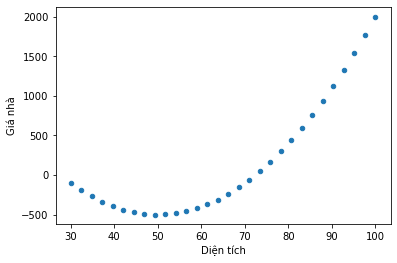

In [67]:
data.plot.scatter(x = "Diện tích", y = "Giá nhà")

In [196]:
data = pd.read_csv("data_square.csv")

In [197]:
# Normalize
data = data.apply(lambda data: (data - data.min(axis = 0)) / (data.max(axis = 0) - data.min(axis = 0))).values

In [198]:
# Số samples, số columns
N, d = data.shape
N, d

(30, 2)

In [199]:
x = data[:, 0].reshape(-1, 1)

# Ma trận output thực
y = data[:, 1].reshape(-1, 1)

In [200]:
x = np.stack([x, np.square(x)], axis=-1)

In [201]:
x = x.reshape(x.shape[0], x.shape[-1])
print(x)

[[0.         0.        ]
 [0.03448286 0.00118907]
 [0.06896571 0.00475627]
 [0.10344857 0.01070161]
 [0.13793143 0.01902508]
 [0.17241429 0.02972669]
 [0.20689714 0.04280643]
 [0.24138    0.0582643 ]
 [0.27586143 0.07609953]
 [0.31034429 0.09631358]
 [0.34482714 0.11890576]
 [0.37931    0.14387608]
 [0.41379286 0.17122453]
 [0.44827571 0.20095112]
 [0.48275857 0.23305584]
 [0.51724143 0.2675387 ]
 [0.55172429 0.30439969]
 [0.58620714 0.34363881]
 [0.62069    0.38525608]
 [0.65517286 0.42925147]
 [0.68965571 0.475625  ]
 [0.72413857 0.52437667]
 [0.75862    0.5755043 ]
 [0.79310286 0.62901214]
 [0.82758571 0.68489811]
 [0.86206857 0.74316222]
 [0.89655143 0.80380446]
 [0.93103429 0.86682484]
 [0.96551714 0.93222335]
 [1.         1.        ]]


In [202]:
# Biến đổi ma trận input x
x = np.hstack((np.ones((N, 1)), x))

In [203]:
x.shape

(30, 3)

In [214]:
# Khởi tạo w
w = np.zeros((x.shape[1], 1))
w

array([[0.],
       [0.],
       [0.]])

In [215]:
# Training with GD algorithm
numOfIteration = 700
cost = np.zeros((numOfIteration,1))
learning_rate = 0.045
for i in range(0, numOfIteration):
    r = np.dot(x, w) - y
    cost[i] = 0.5*np.sum(r*r)
    # correct the shape dimension
    w = w - learning_rate * np.dot(x.T, r)
    print('step {}, cost: {}'.format(i, cost[i]))

step 0, cost: [2.35698808]
step 1, cost: [1.89215121]
step 2, cost: [1.53820701]
step 3, cost: [1.26593496]
step 4, cost: [1.05441592]
step 5, cost: [0.88855101]
step 6, cost: [0.75734526]
step 7, cost: [0.65271619]
step 8, cost: [0.56866334]
step 9, cost: [0.50068659]
step 10, cost: [0.44537644]
step 11, cost: [0.40012368]
step 12, cost: [0.36291207]
step 13, cost: [0.33216924]
step 14, cost: [0.30665846]
step 15, cost: [0.28539936]
step 16, cost: [0.26760931]
step 17, cost: [0.25265965]
step 18, cost: [0.2400426]
step 19, cost: [0.22934608]
step 20, cost: [0.22023432]
step 21, cost: [0.21243274]
step 22, cost: [0.20571618]
step 23, cost: [0.19989951]
step 24, cost: [0.19483021]
step 25, cost: [0.19038243]
step 26, cost: [0.18645213]
step 27, cost: [0.18295323]
step 28, cost: [0.17981443]
step 29, cost: [0.17697661]
step 30, cost: [0.17439073]
step 31, cost: [0.17201608]
step 32, cost: [0.16981884]
step 33, cost: [0.16777092]
step 34, cost: [0.16584896]
step 35, cost: [0.16403354]
ste

In [216]:
w

array([[ 0.14494308],
       [-1.03465479],
       [ 1.87801042]])

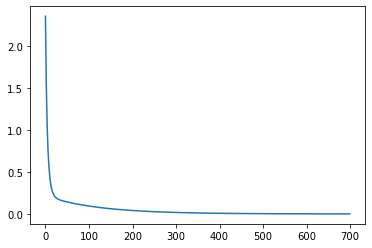

In [217]:
plt.plot(cost)

[[ 0.14494308]
 [-1.03465479]
 [ 1.87801042]]


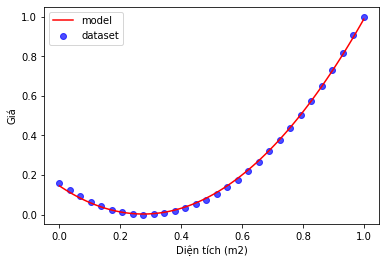

In [218]:
# Show
a = []
b = []
print(w)
for i in np.linspace(0., 1., 100):
    j = w[1] * i + w[2] * i * i + w[0]
    a.append(i)
    b.append(j)

plt.plot(a, b, c='r', label="model")

X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)
plt.scatter(X, Y, c='b', label="dataset", alpha = 0.7)

plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá')
plt.legend()